In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
from sklearn.feature_selection import f_classif 
from sklearn.feature_selection import SelectKBest, f_regression , mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [21]:
df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

In [22]:
X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score'].values.reshape(-1, 1)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X)

In [24]:
# Step 1: Forward Feature Selection using Ridge as base estimator
# You can adjust n_features_to_select to control the number of features to be selected
ridge = Ridge()
sfs = SequentialFeatureSelector(ridge, n_features_to_select=12, direction='forward')
sfs.fit(X_train_scaled, y)

# Get the selected feature indices and corresponding feature names
selected_feature_indices = sfs.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features
print(f'Selected features by Forward Feature Selection: {selected_feature_names}')
# Step 2: Bagging Regressor with selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

bagging_model = BaggingRegressor(random_state=42)
bagging_model.fit(X_train_selected, y)

# Step 3: Predictions
y_pred = bagging_model.predict(X_test_selected)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y, y_pred)
# Output the results
print(f"Mean Absolute Error: {mae}")

/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/intern

Selected features by Forward Feature Selection: Index(['gender', 'Age', 'Income', 'Loan_Amount', 'Loan_Term_Months',
       'Rent_Payments', 'Utility_Payments_On_Time',
       'Mobile_Phone_Payment_On_Time', 'Social_Media_Activity_Score',
       'Transaction_Behavior_Score', 'demographics_Rural',
       'demographics_Sub_Urban'],
      dtype='object')
Mean Squared Error: 0.023359633543929118
Root Mean Squared Error: 0.1528385865674278
Mean Absolute Error: 0.12627206645898237


/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/internship codes/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/parmikenia/Desktop/intern

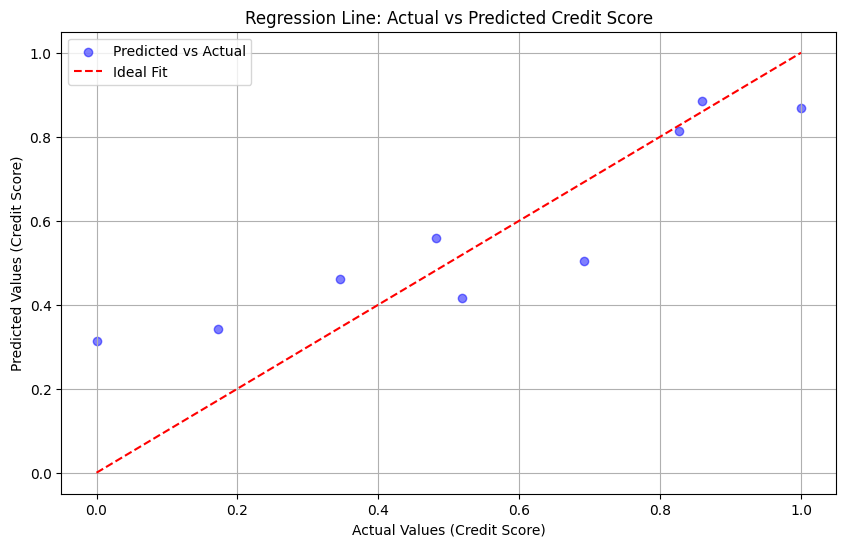

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_test and y_pred are numpy arrays
y_test = np.array(y).flatten()
y_pred = np.array(y_pred).flatten()

plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")

# Ideal fit line (where predicted = actual)
min_val = np.min([y_test, y_pred])
max_val = np.max([y_test, y_pred])
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal Fit")

# Add labels and title
plt.xlabel("Actual Values (Credit Score)")
plt.ylabel("Predicted Values (Credit Score)")
plt.title("Regression Line: Actual vs Predicted Credit Score")
plt.legend()
plt.grid(True)
plt.show()
